In [1]:
from jax import config
config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jaxley as jx
from jaxley.channels import Na, K, Leak

## 1. Steady-State

### a) Single Compartment

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param,Leak,Leak_gLeak,Leak_eLeak
0,0,0,0,10.0,1.0,5000.0,1.0,-70.0,0,0,0,0,True,0.0001,-70.0


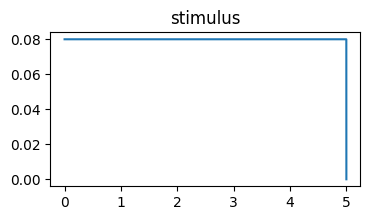

In [2]:
# create compartment 
comp = jx.Compartment()
comp.insert(Leak())

# create stimulus
dt = 0.001
tmax = 5
dur = 5
i_amp = 0.08

time_vec = np.arange(0, tmax + dt, dt)
current = jx.step_current(0, dur, i_amp, dt, tmax)
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
_ = plt.plot(time_vec, current)
plt.title('stimulus')

comp.nodes


Added 1 external_states. See `.externals` for details.
Added 1 recordings. See `.recordings` for details.
gleak=0.01 	 v=-57.39
gleak=0.005 	 v=-44.66
gleak=0.001 	 v=56.34


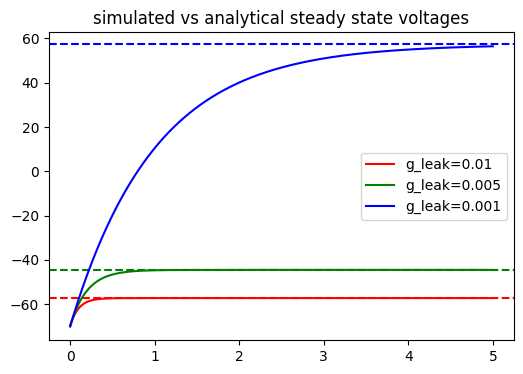

In [3]:
# set stimulation and recording sites and run simulation
comp.delete_stimuli()
comp.delete_recordings()

comp.stimulate(current)
comp.record("v")


gleaks = [1e-2, 5e-3, 1e-3]
colors = ['r', 'g', 'b']

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i, gleak in enumerate(gleaks):
    comp.set("Leak_gLeak", gleak) 
    
    steady_state = i_amp * 1e-6 / (comp.nodes.get("Leak_gLeak") *  2 * np.pi * comp.nodes.get("radius") * 1e-4 * comp.nodes.get("length") * 1e-4) + comp.nodes.get("Leak_eLeak")
    
    voltages = jx.integrate(comp, delta_t=dt)
    ax.plot(time_vec, voltages[0][:-1], color=colors[i], label=f"g_leak={gleak}")
    ax.axhline(steady_state.values[0], color=colors[i], linestyle='--')
    
    print(f"gleak={gleak} \t v={voltages[0][-1]:.2f}")
    
plt.legend()
plt.title('simulated vs analytical steady state voltages')
plt.show()


### b) Length and time constants

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param,Leak,Leak_gLeak,Leak_eLeak
0,0,0,0,10.0,1.0,5000.0,0.1,-70.0,0,0,0,0,True,0.0001,-70.0
1,0,0,1,10.0,1.0,5000.0,0.1,-70.0,0,0,1,0,True,0.0001,-70.0
2,0,0,2,10.0,1.0,5000.0,0.1,-70.0,0,0,2,0,True,0.0001,-70.0
3,0,0,3,10.0,1.0,5000.0,0.1,-70.0,0,0,3,0,True,0.0001,-70.0
4,0,0,4,10.0,1.0,5000.0,0.1,-70.0,0,0,4,0,True,0.0001,-70.0
5,0,0,5,10.0,1.0,5000.0,0.1,-70.0,0,0,5,0,True,0.0001,-70.0
6,0,0,6,10.0,1.0,5000.0,0.1,-70.0,0,0,6,0,True,0.0001,-70.0
7,0,0,7,10.0,1.0,5000.0,0.1,-70.0,0,0,7,0,True,0.0001,-70.0
8,0,0,8,10.0,1.0,5000.0,0.1,-70.0,0,0,8,0,True,0.0001,-70.0
9,0,0,9,10.0,1.0,5000.0,0.1,-70.0,0,0,9,0,True,0.0001,-70.0


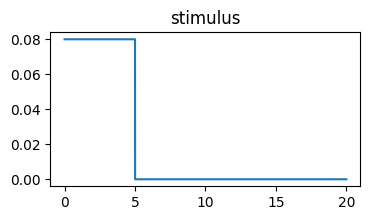

In [4]:
# create linear connected compartment
NCOMP = 20
COMP_LENGTH=10
comp = jx.Compartment()
comp.set('length', COMP_LENGTH)
branch = jx.Branch(comp, ncomp=NCOMP)
branch.insert(Leak())
branch.set('capacitance', 0.1)

# create stimulus
dt = 0.00001
tmax = 20
dur = 5
i_amp = 0.08

time_vec = np.arange(0, tmax + dt, dt)
current = jx.step_current(0, dur, i_amp, dt, tmax)
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
_ = plt.plot(time_vec, current)
plt.title('stimulus')

branch.nodes

Added 1 external_states. See `.externals` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.r

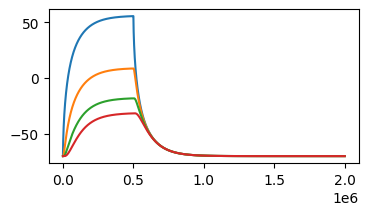

In [5]:
# set stimulation and recording sites and run simulation
branch.delete_stimuli()
branch.delete_recordings()

branch.comp(0).stimulate(current)
for i in range(NCOMP):
    branch.comp(i).record('v')
    
voltages = jx.integrate(branch, delta_t=dt)

fig, ax = plt.subplots(1,1, figsize=(4,2))
for i in range(0, NCOMP, 5):
    ax.plot(voltages[i])


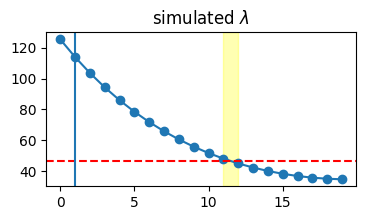

In [6]:
# get simulated lambda
max_vs = np.max(voltages, axis=1) + 70
threshold = max_vs[0] * 0.37
id_lambda = np.argmax(max_vs <= threshold)
lambda_start, lambda_end = [COMP_LENGTH *  (id_lambda - 1),  COMP_LENGTH * id_lambda]

# get analytical length constant lambda
r_leak = 1 / (branch.comp(0).nodes.get('Leak_gLeak') * 2 * np.pi * branch.comp(0).nodes.get('radius') * 1e-4 * COMP_LENGTH * 1e-4)
r_a = branch.comp(0).nodes.get('axial_resistivity') * COMP_LENGTH * 1e-4 / (np.pi * (branch.comp(0).nodes.get('radius')* 1e-4)**2)
lambda_ana = np.sqrt(r_leak/r_a)

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(max_vs, '-o', label='max_vs')  # Line plot
ax.axhline(0.37 * max_vs[0], linestyle='--', color='r', label='Threshold')
ax.axvspan(id_lambda - 1, id_lambda, color='yellow', alpha=0.3, label=r'$\lambda$ region')
ax.axvline(lambda_ana.values[0] / COMP_LENGTH)
ax.set_title(r'simulated $\lambda$') 
plt.show()


In [7]:
lambda_ana.values[0]

np.float64(10.0)

In [10]:
# get simulated tau
max_vs = np.max(voltages, axis=1, keepdims=True) + 70
thresholds = max_vs * 0.63
id_taus_end = np.argmax(voltages + 70 > thresholds, axis=1)
id_taus_start = np.argmax(voltages + 70 > 2, axis=1)

taus = (id_taus_end - id_taus_start) * dt
taus


Array([0.47129, 0.53267, 0.59158, 0.64883, 0.70478, 0.75959, 0.81312,
       0.86499, 0.91456, 0.961  , 1.00335, 1.04053, 1.07147, 1.09523,
       1.11134, 1.12015, 1.12319, 1.12273, 1.12107, 1.11985],      dtype=float64, weak_type=True)

In [ ]:
# calculate tau analytically
branch.comp(0).nodes.get('capacitance') * 1e-3 / branch.comp(0).nodes.get('Leak_gLeak')

0    1.0
dtype: float64